# Marangoni convection

initial value problem on $(\textbf{x}, t)\in\Omega\times[0,\infty)$

$$\frac{1}{Pr}\left(\frac{\partial\textbf{u}}{\partial t}+\textbf{u}\cdot\nabla\textbf{u}\right)=-\nabla p + \nabla^2\textbf{u} + \rho(c)\,\textbf{e}_g$$

$$\frac{\partial c}{\partial t} + \textbf{u}\cdot\nabla c = \nabla^2 c$$

constitutive relations

$$\varepsilon(\textbf{u})=\tfrac{1}{2}(\nabla\textbf{u} + (\nabla\textbf{u})^{\mathsf{T}})$$

$$\sigma(\textbf{u}, p) = -p\,\mathsf{I} + 2\mu\varepsilon(\textbf{u})$$

$$\implies \nabla\cdot\sigma=-\nabla p + \mu\nabla^2\textbf{u}$$

$$\rho(c)=-Ra\,c$$

$$\gamma(c) = \gamma_0 - Ma\,c$$

initial conditions

$$\textbf{u}(\textbf{x},t=0)=\textbf{u}_0(\textbf{x})$$

$$p(\textbf{x},t=0)=p_0(\textbf{x})$$

Dirichlet boundary condition on $\textbf{x}\in\partial\Omega_{\text{D},c}$

$$c = c_{\text{D}}$$

Neumann boundary condition on $\textbf{x}\in\partial\Omega_{\text{N},c}=\partial\Omega/\partial\Omega_{\text{D},c}$

$$\textbf{n}\cdot\nabla c = c_{\text{N}}$$

essential boundary condition on $\textbf{x}\in\partial\Omega_E$

$$\textbf{u} = \textbf{u}_{\text{E}}$$

natural boundary condition on $\textbf{x}\in\partial\Omega_{\text{N}}=\partial\Omega/\partial\Omega_{\text{E}}$

$$\sigma\cdot\textbf{n} = \left(\textbf{t}\cdot\nabla\gamma\right)\textbf{t} + \left(-p_{\text{ext}} + (\nabla\cdot\textbf{n})\gamma\right)\textbf{n}$$

## Example: $d=2$ rectangle


$$\Omega = [0, L_x] \times [0, L_y]$$

$$\textbf{u}(x=0, y)=\textbf{u}(x=L_x, y)=\textbf{u}(x, y=0)=\textbf{0}$$

$$\sigma\cdot\textbf{n}\vert_{x,y=L_y} = \frac{\partial\gamma}{\partial x}\textbf{e}_x -p_{\text{ext}}\textbf{e}_y = -Ma\frac{\partial c}{\partial x}\,\textbf{e}_x -p_{\text{ext}}\textbf{e}_y$$

$$c_0(x,y)=\text{exp}\left(-\frac{y}{\epsilon L_y}\right) + \mathcal{N}(x,y)$$

$$c(x,y=0)=1$$

$$\frac{\partial c}{\partial x}\bigg\vert_{x,L_y}=\frac{\partial c}{\partial x}\bigg\vert_{x=0,y}=\frac{\partial c}{\partial x}\bigg\vert_{x=L_x,y}=0$$

$$\textbf{e}_g=-\textbf{e}_y$$

In [1]:
import numpy as np
from lucifex.sim import integrate
from lucifex.viz import plot_colormap
from lucifex.io import write
from lucifex.utils import maximum

from py.marangoni_convection import navier_stokes_marangoni


Ra = 1e4
Pr = 1e1
Ma = -1e1
simulation = navier_stokes_marangoni(
    Lx=2.0,
    Ly=1.0,    
    Nx=64,
    Ny=64,
    cell='quadrilateral',
    Ra=Ra,
    Pr=Pr,
    Ma=Ma,
    dt_max=0.01, 
)

n_stop = 50
dt_init = 1e-6
n_init = 10
integrate(simulation, n_stop=n_stop, dt_init=dt_init, n_init=n_init)

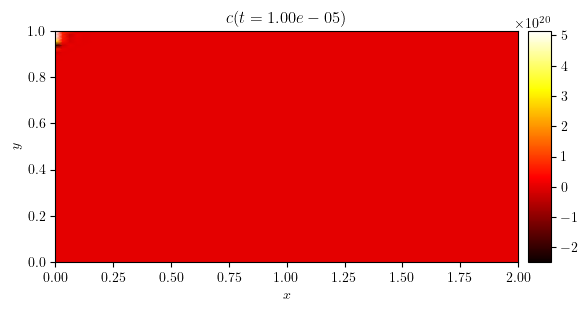

In [2]:
c = simulation['c']

time_index = -1
fig, ax = plot_colormap(c.series[time_index], title=f'$c(t={c.time_series[time_index]:.2e})$')
# write(fig, f'A21_marangoni_convection', './figures', close=False, pickle=False)